In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
path = '../data/lqg_final/linear_gaussian_policy/1592338322.3484251/'
num_experiments = 10

In [3]:
file = pd.read_csv(path+'pgirl.csv')
pgirl = []
episodes = np.sort(list(set(file['num_episodes'])))
for num_samples in np.sort(list(set(file['num_episodes']))):
    running = []
    for num_run in np.sort(list(set(file['run']))):
        indices = np.logical_and(file['num_episodes']==num_samples, file['run']==num_run)
        running.append(file.loc[indices, 'diff_weights'][np.where(indices)[0][0]])
    running = np.array(running)
    pgirl.append((running.mean(), running.std()))
pgirl = np.array(pgirl)

In [4]:
file = pd.read_csv(path+'ra_pgirl_full.csv')
ra_pgirl_full = []
episodes = np.sort(list(set(file['num_episodes'])))
for num_samples in np.sort(list(set(file['num_episodes']))):
    running = []
    for num_run in np.sort(list(set(file['run']))):
        indices = np.logical_and(file['num_episodes']==num_samples, file['run']==num_run)
        running.append(file.loc[indices, 'diff_weights'][np.where(indices)[0][0]])
    running = np.array(running)
    ra_pgirl_full.append((running.mean(), running.std()))
ra_pgirl_full = np.array(ra_pgirl_full)

FileNotFoundError: [Errno 2] File ../data/lqg_final/linear_gaussian_policy/1592338322.3484251/ra_pgirl_full.csv does not exist: '../data/lqg_final/linear_gaussian_policy/1592338322.3484251/ra_pgirl_full.csv'

In [6]:
file = pd.read_csv(path+'ra_pgirl_diag.csv')
ra_pgirl_diag = []
episodes = np.sort(list(set(file['num_episodes'])))
for num_samples in np.sort(list(set(file['num_episodes']))):
    running = []
    for num_run in np.sort(list(set(file['run']))):
        indices = np.logical_and(file['num_episodes']==num_samples, file['run']==num_run)
        running.append(file.loc[indices, 'diff_weights'][np.where(indices)[0][0]])
    running = np.array(running)
    ra_pgirl_diag.append((running.mean(), running.std()))
ra_pgirl_diag = np.array(ra_pgirl_diag)

In [7]:
file = pd.read_csv(path+'csi.csv')
csi = []
episodes = np.sort(list(set(file['num_episodes'])))
for num_samples in np.sort(list(set(file['num_episodes']))):
    running = []
    for num_run in np.sort(list(set(file['run']))):
        indices = np.logical_and(file['num_episodes']==num_samples, file['run']==num_run)
        running.append(file.loc[indices, 'diff_weights'][np.where(indices)[0][0]])
    running = np.array(running)
    csi.append((running.mean(), running.std()))
csi = np.array(csi)

In [8]:
file = pd.read_csv(path+'re_irl.csv')
re_irl = []
episodes = np.sort(list(set(file['num_episodes'])))
for num_samples in np.sort(list(set(file['num_episodes']))):
    running = []
    for num_run in np.sort(list(set(file['run']))):
        indices = np.logical_and(file['num_episodes']==num_samples, file['run']==num_run)
        running.append(file.loc[indices, 'diff_weights'][np.where(indices)[0][0]])
    running = np.array(running)
    re_irl.append((running.mean(), running.std()))
re_irl = np.array(re_irl)

In [ ]:
file = pd.read_csv(path+'ra_pgirl_cov_estimation.csv')
ra_pgirl_cov_estimation = []
episodes = np.sort(list(set(file['num_episodes'])))
for num_samples in np.sort(list(set(file['num_episodes']))):
    running = []
    for num_run in np.sort(list(set(file['run']))):
        indices = np.logical_and(file['num_episodes']==num_samples, file['run']==num_run)
        running.append(file.loc[indices, 'diff_weights'][np.where(indices)[0][0]])
    running = np.array(running)
    ra_pgirl_cov_estimation.append((running.mean(), running.std()))
ra_pgirl_cov_estimation = np.array(ra_pgirl_cov_estimation)

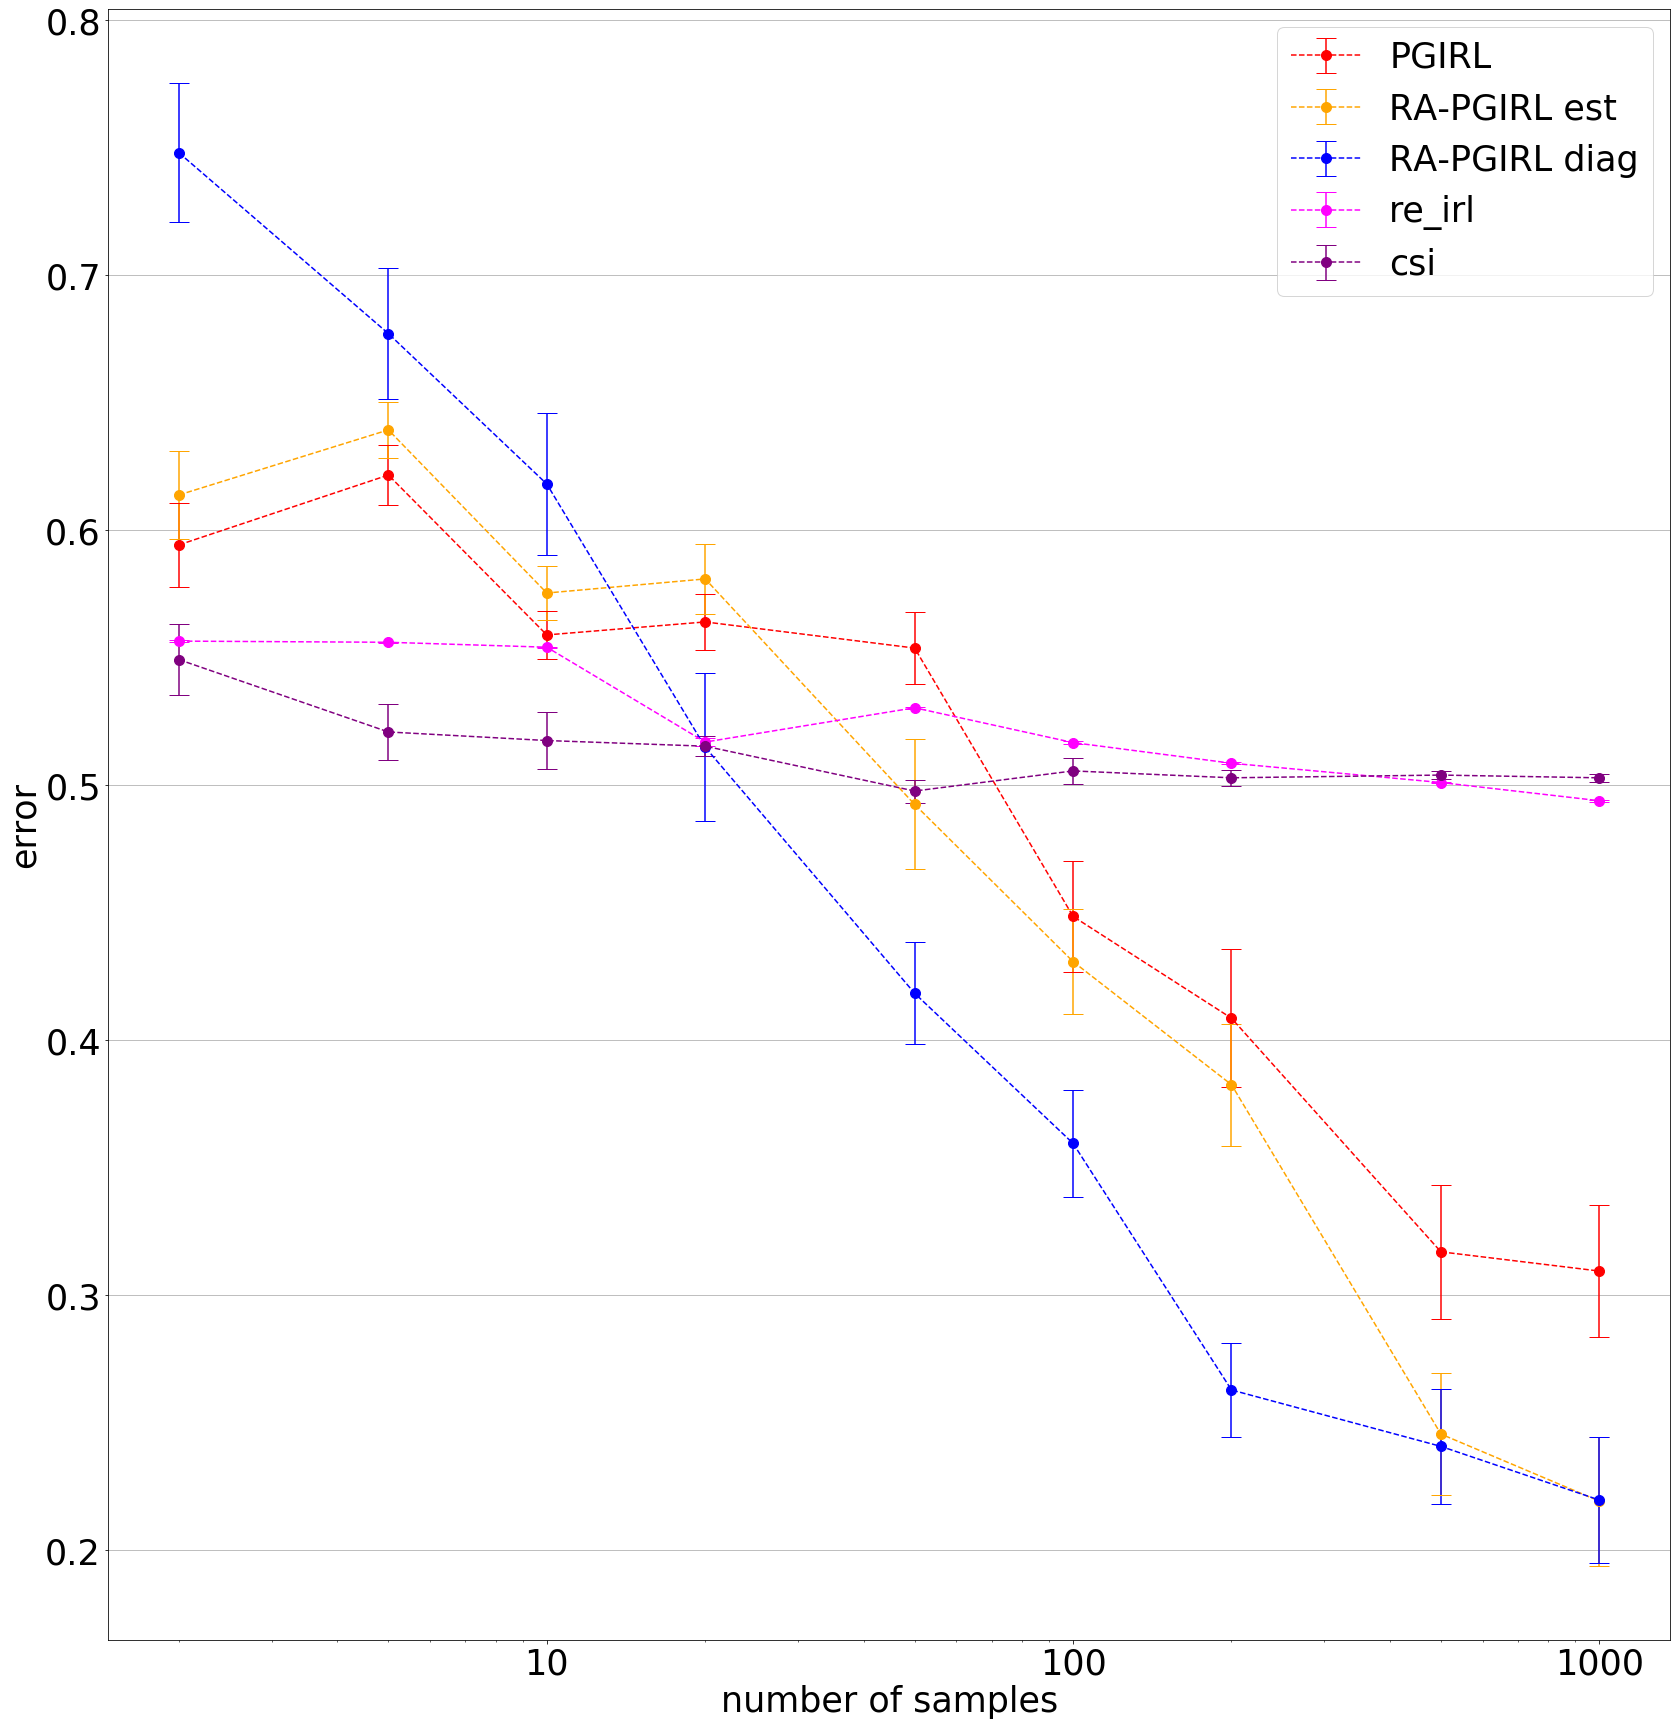

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
font = {'size': 35}
matplotlib.rc('font', **font)
matplotlib.rcParams.update({'errorbar.capsize': 10})
fig, ax = plt.subplots(1, 1, figsize=(28, 30))

ax.set_xscale('log')
ax.set_xlabel('number of samples')
ax.set_ylabel('error')
#ax.set_xticks([30, 50, 100, 200, 300, 400, 500, 700, 1000, 2000])
#ax.set_yticks(np.arange(-0.4, 1.3, 0.1))
ax.grid(axis='y')

plt.gca().xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.f'))
conf = 0.5

ax.errorbar(x=episodes, y=pgirl[:, 0], yerr=conf*pgirl[:, 1]/np.sqrt(num_experiments), c='red', label='PGIRL', fmt='--o', markersize=10)
#ax.errorbar(x=episodes, y=ra_pgirl_full[:, 0], yerr=conf*ra_pgirl_full[:, 1]/np.sqrt(num_experiments), c='green', label='RA-PGIRL', fmt='o--', markersize=10)
ax.errorbar(x=episodes, y=ra_pgirl_cov_estimation[:, 0], yerr=conf*ra_pgirl_cov_estimation[:, 1]/np.sqrt(num_experiments), c='orange', label='RA-PGIRL est', fmt='o--', markersize=10)
ax.errorbar(x=episodes, y=ra_pgirl_diag[:, 0], yerr=conf*ra_pgirl_diag[:, 1]/np.sqrt(num_experiments), c='blue', label='RA-PGIRL diag', fmt='o--', markersize=10)
ax.errorbar(x=episodes, y=re_irl[:, 0], yerr=conf*re_irl[:, 1]/np.sqrt(num_experiments), c='magenta', label='re_irl', fmt='o--', markersize=10)
ax.errorbar(x=episodes, y=csi[:, 0], yerr=conf*csi[:, 1]/np.sqrt(num_experiments), c='purple', label='csi', fmt='o--', markersize=10)



ax.legend()

plt.savefig('plt.pdf', bbox_inches='tight', pad_inches=0, papertype='letter')